In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

2022-05-24 17:40:13.757429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:40:13.757456: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


((25000,), (25000,), (25000,), (25000,))

In [2]:
train_data[0:1], train_labels[0:1]


(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
       dtype=object),
 array([1]))

In [3]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(imdb.get_word_index(), train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 10000), (25000,), (25000, 10000), (25000,))

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])


2022-05-24 17:40:18.561139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 17:40:18.561335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:40:18.561365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-24 17:40:18.561392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-24 17:40:18.561418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
n_val = 10000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape


((10000, 10000), (15000, 10000), (10000,), (15000,))

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5213 - accuracy: 0.7887 - val_loss: 0.4114 - val_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3155 - accuracy: 0.8991 - val_loss: 0.3224 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.9271 - val_loss: 0.2828 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1823 - accuracy: 0.9411 - val_loss: 0.2740 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1503 - accuracy: 0.9514 - val_loss: 0.2844 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1206 - accuracy: 0.9625 - val_loss: 0.2915 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1013 - accuracy: 0.9691 - val_loss: 0.3169 - val_accuracy: 0.8804
Epoch 8/20
30/30 [=

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

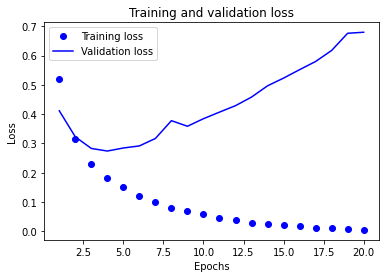

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

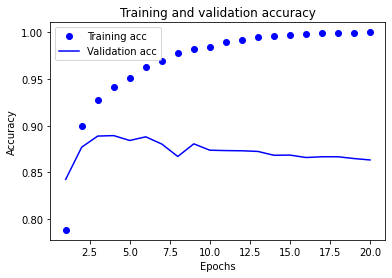

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 13ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.7060 - val_accuracy: 0.8628
Epoch 2/4
30/30 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.7834 - val_accuracy: 0.8569
Epoch 3/4
30/30 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.7754 - val_accuracy: 0.8610
Epoch 4/4
782/782 [==============================] - 0s 529us/step - loss: 1.0575 - accuracy: 0.8296


[1.0574910640716553, 0.8295599818229675]

In [12]:
y_pred = model.predict(x_test)
y_pred

782/782 [==============================] - 0s 442us/step


array([[6.5168331e-04],
       [1.0000000e+00],
       [1.3500957e-01],
       ...,
       [2.3066372e-04],
       [2.5792685e-03],
       [6.4286254e-02]], dtype=float32)

In [13]:
np.sum(((y_pred>0.5).reshape(-1,) == (y_test>0.5).reshape(-1,)))/len(y_test)


0.82956